In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (12,8)

### Problem 1

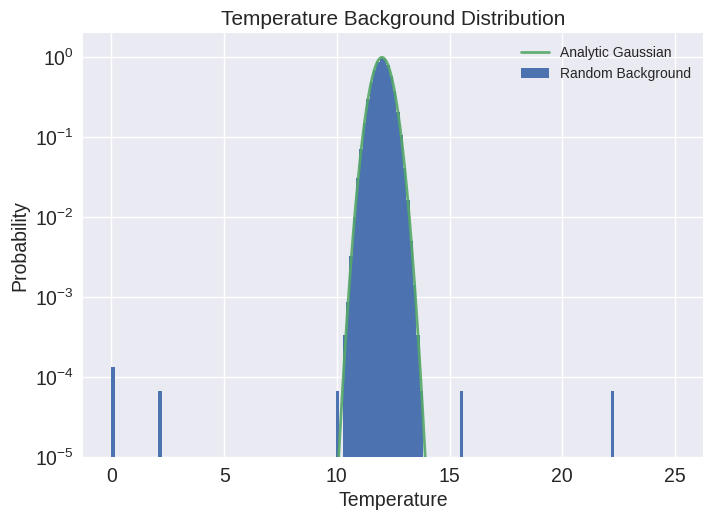

In [5]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1)

ax.hist(d, 150, density=True, label="Random Background")

ax.tick_params(labelsize = 14)
ax.set_yscale('log')
ax.set_xlabel("Temperature", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.set_title("Temperature Background Distribution", fontsize=15)
ax.set_ylim([1e-5, 2])

x = np.linspace(0, 25, 1000)
ax.plot(x,stats.norm.pdf(x, loc = 12, scale = 0.4), linewidth = 2, alpha = 0.9, label="Analytic Gaussian")

plt.legend(loc=0)

plt.show()

**Statistical question:** How many data points lie outside a chosen threshold of the background distribution, a Gaussian with mean 12 and width 0.4?

This statistical question highlights that we are looking for data points _outside_ a threshold, so the integration should be in two parts; one integral should be below the lower bound of the threshold, and one integral should be above the upper bound. Additionally, we are not looking for a statistical significance or a probability, we just want the number of data points. 

$N_{outside} = \int_{-\infty}^{-5\sigma}T(x)dx +  \int_{{5\sigma}}^{\infty}T(x) dx  $, where $T(x)$ is the temperature frequency distribution. We have chosen a statistical threshold of 5$\sigma$ in an attempt to avoid throwing out true background data, which is more likely to be within this value.

In [6]:
prob5sigma = stats.norm.sf(5, scale=1, loc=0)

threshold_lower = stats.norm.ppf(prob5sigma, loc = 12, scale = 0.4)
threshold_upper = stats.norm.ppf(1 - prob5sigma, loc = 12, scale = 0.4)

print("The chosen threshold of 5σ corresponds to values x < "+str(threshold_lower)+" and x > "+str(round(threshold_upper, 2))+".")

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

values_above = np.empty(0)
for i in range(len(d)):
    if(d[i] >= threshold_upper):
        values_above = np.append(values_above, d[i])
        
values_below = np.empty(0)
for i in range(len(d)):
    if(d[i] <= threshold_lower):
        values_below = np.append(values_below, d[i])
        
total_bad_data = len(values_above) + len(values_below)
print("Out of "+str(len(d))+" total values, "+str(total_bad_data)+
      " are outside the threshold.")

The chosen threshold of 5σ corresponds to values x < 10.0 and x > 14.0.
Out of 100008 total values, 6 are outside the threshold.


In [7]:
my_data = {'':['My Test Good', 'My Test Bad', 'Count'], 'True Good': [100000, 0, 100000], 'True Bad': [2, 6, 8]}
df = pd.DataFrame(data=my_data)
df

,,True Good,True Bad
0,My Test Good,100000,2
1,My Test Bad,0,6
2,Count,100000,8


**B)** There were no omissions of good data with the chosen statistical threshold. If the threshold were to tighten, however, it would begin to remove more and more good data.

**C)** There were 2 mistakes of commission (the test said 2 bad data points were good). Some are unavoidable, as they are in the middle of the dataset and too close to the mean to ever consider throwing out. If there were more fringe-case bad data points, however, tightening the threshold would reduce these mistakes.

### Problem 2

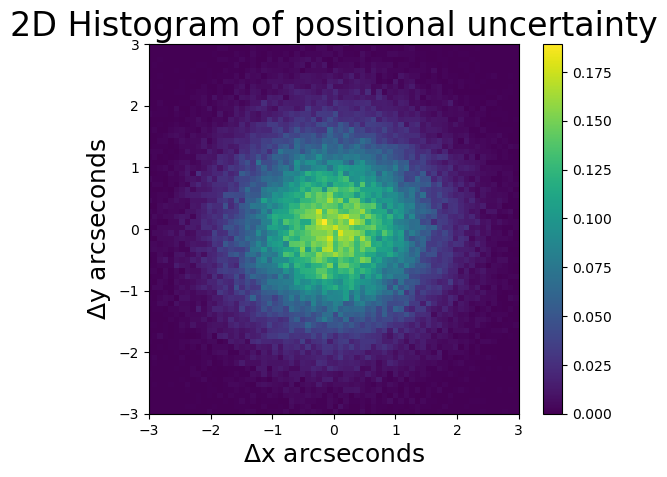

In [8]:
a = np.vstack((stats.norm.rvs(scale = 1, size = 100000), stats.norm.rvs(scale = 1, size = 100000)))
a.shape
plt.style.use('default')
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

**Statistical Question:** Assuming a null-hypothesis background, what signal (distance travelled) is associated with a 5$\sigma$ significance? 

Distance is given by $\sqrt{X^2 + Y^2}$. Both X and Y are independent Gaussian distribtions, and the Euclidian norm of two Gaussians produces a Rayleigh. Therefore, the integral is

\begin{aligned}
Probability = \int_{{d}}^{\infty}pdf(x) dx
\end{aligned}

where _d_ is the unknown distance, _probability_ is the 5$\sigma$ value of a Gaussian, and the _pdf_ is of a Rayleigh distribution.

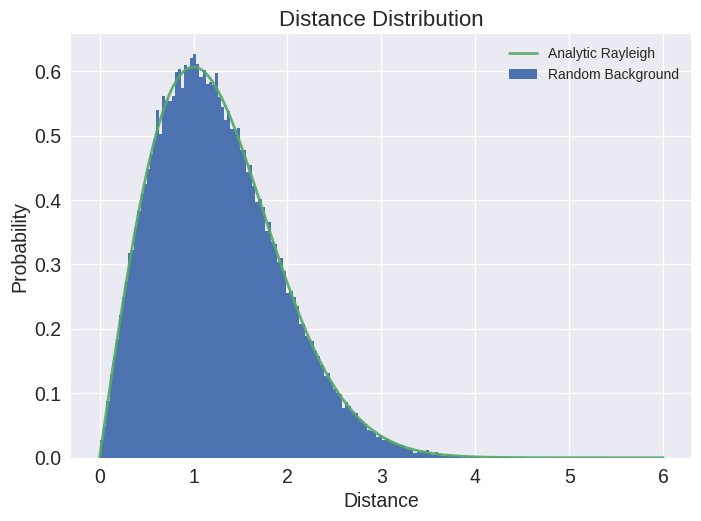

In [11]:
x = a[0]
y = a[1]
distance = np.sqrt(x**2 + y**2)

plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1)

ax.hist(distance, 150, density = True, label="Random Background")

x = np.linspace(0, 6, 1000)
y = stats.rayleigh.pdf(x, loc=0, scale=1)
ax.plot(x, y, linewidth = 2, alpha = 0.9, label="Analytic Rayleigh")

ax.tick_params(labelsize = 14)
ax.set_xlabel("Distance", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.set_title("Distance Distribution", fontsize=16)

plt.legend(loc=0)
plt.show()

In [12]:
prob5sigma = stats.norm.cdf(5, loc = 0, scale = 1)
distance = stats.rayleigh.ppf(prob5sigma, loc = 0, scale = 1)

print("The distance corresponding to a 5σ detection is "
      +str(round(distance, 2))+" arcsec.")

The distance corresponding to a 5σ detection is 5.49 arcsec.


### Problem 3

**Statistical Question:** Assuming there is no signal, what's the chance that a background with a mean of 1 cosmic ray/minute produces 6,800 cosmic rays over 15 days in the shadow of the moon? 

The background follows a Poisson distribution, and the probability integral is

\begin{aligned}
Probability = \int_{-\infty}^{6800}pdf(x) dx
\end{aligned}

The mean of this distribution is [1 (cosmic ray / minute) * 60 (minutes / hour) * 8 (hours / day) *  15 (days)] = 7200. Our measurement value is below the mean, so the integral is to the left.

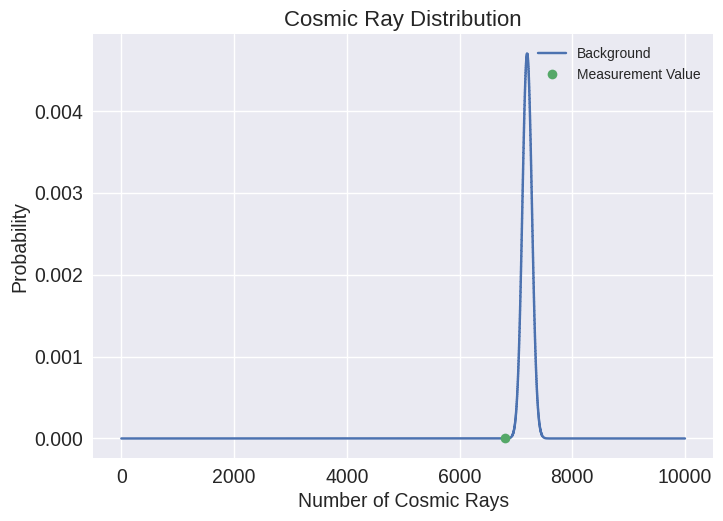

In [15]:
measurement_value = 6800
background_average = 1*60*8*15

k = np.arange(0, 10000, 1)
y = stats.poisson.pmf(k, background_average, loc=0)

fig, ax = plt.subplots(1, 1)
ax.step(k, y, label='Background')

ax.plot(measurement_value, 0, 'o', label='Measurement Value')

ax.tick_params(labelsize = 14)
ax.set_xlabel("Number of Cosmic Rays", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.set_title("Cosmic Ray Distribution", fontsize=16)

plt.legend(loc=0)

plt.show()

In [54]:
prob = stats.poisson.cdf(measurement_value, background_average, loc=0)
sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("The significance of detecting 6800 cosmic rays in the shadow of the moon is "+str(abs(round(sigma,2)))+", not a discovery.")

The significance of detecting 6800 cosmic rays in the shadow of the moon is 4.75, not a discovery.
